# <center> Лабораторна робота з криптографії №2</center>
#### <div align=right >Виконав: Костюковець Остап ФБ-96</div>
#### <div align=right >Варіант №5</div>

### <center> Криптоаналіз шифру Віженера </center>

**Мета**: Засвоєння методів частотного криптоаналізу. Здобуття навичок роботи та аналізу
потокових шифрів гамування адитивного типу на прикладі шифру Віженера.

## Хід роботи


### Завдання 1

> Самостійно підібрати текст для шифрування (2-3 кб) та ключі довжини r = 2, 3, 4, 5, а також довжини 10-20 знаків. Зашифрувати обраний відкритий текст шифром Віженера з цими ключами.

In [1]:
ru_RU = list("абвгдежзийклмнопрстуфхцчшщъыьэюя")
m = len(ru_RU)
ru_enum = dict(zip(range(len(ru_RU)),ru_RU))
ru_enum_re = dict(zip(ru_RU,range(len(ru_RU))))

text = open("mytext.txt", "r").read()
print(text)

преступлениеинаказаниегениальныйроманглавныетемыкоторогопреступлениеинаказаниежертвенностьилюбовьсвободаигордостьчеловекаобрамленыпочтидетективнымсюжетоммногократноэкранизированныйинеразпоставленныйнасценеонипосейденьчитаетсянаодномдыханиичастьперваячастьвтораячастьтретьячастьчетвертаячастьпятаячастьшестаяэпилогчастьперваявначалеиюлявчрезвычайножаркоевремяподвечеродинмолодойчеловеквышелизсвоейкаморкикоторуюнанималотжильцоввсмпереулкенаулицуимедленнокакбывнерешимостиотправилсяккнумостуонблагополучноизбегнулвстречиссвоеюхозяйкойналестницекаморкаегоприходиласьподсамоюкровлейвысокогопятиэтажногодомаипоходилаболеенашкафчемнаквартируквартирнаяжехозяйкаегоукоторойоннанималэтукаморкусобедомиприслугойпомещаласьодноюлестницейнижевотдельнойквартиреикаждыйразпривыходенаулицуемунепременнонадобылопроходитьмимохозяйкинойкухнипочтивсегданастежьотвореннойналестницуикаждыйразмолодойчеловекпроходямимочувствовалкакоетоболезненноеитрусливоеощущениекоторогостыдилсяиоткоторогоморщилсяонбылдолженкругомхозяйке

In [2]:
def encode(text, key):
    r = len(key)
    text_len = len(text)
    encoded = ""
    for i in range(text_len):
        key_c = key[i % r]
        encoded += ru_enum[(ru_enum_re[text[i]] + ru_enum_re[key_c]) % m]
    return encoded


def decode(text, key):
    r = len(key)
    text_len = len(text)
    decoded = ""
    for i in range(text_len):
        key_c = key[i % r]
        decoded += ru_enum[(ru_enum_re[text[i]] - ru_enum_re[key_c]) % m]
    return decoded


def encode_with_keys(text):
    keys = ["до", "йот", "море", "словодляшифра"]
    encoded = []
    for key in keys:
        encoded.append(encode(text, key))

    return encoded, keys


### Завдання 2

> Підрахувати індекси відповідності для відкритого тексту та всіх одержаних шифртекстів і порівняти їх значення.

In [3]:
from collections import Counter

def index_of_coincidence(text):
    n = len(text)
    letter_frequency = Counter(text)
    c_idx = 0

    for pair in letter_frequency.items():
        c_idx += pair[1] * (pair[1] - 1)

    return c_idx / (n*(n-1))


enc_w_keys, keys = encode_with_keys(text)
standart_ci = index_of_coincidence(text)
print(f"Init text : {standart_ci}")
for i,v in enumerate(enc_w_keys):
    print(f"encoded text, key {keys[i]} : {index_of_coincidence(v)}")



Init text : 0.05688477295917046
encoded text, key до : 0.04034888719693792
encoded text, key йот : 0.042716927969503445
encoded text, key море : 0.037513660777641386
encoded text, key словодляшифра : 0.033082130407984627


### Завдання 3

> Використовуючи наведені теоретичні відомості, розшифрувати наданий шифртекст (згідно свого номеру варіанта).

In [4]:
text_5 = open("text.txt","r").read().replace("\n",'')
print(f"Index of coincidence : {index_of_coincidence(text_5)}")

Index of coincidence : 0.03532444245066751


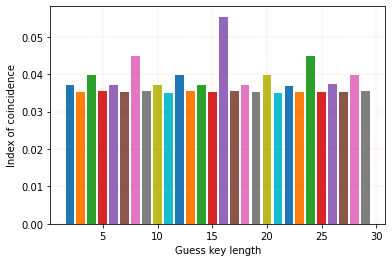

In [5]:
import matplotlib.pyplot as plot


def draw_plot(key_lengths, i_cs):
    for key_length in range(len(key_lengths)):
        plot.bar(
            key_lengths[key_length],
            i_cs[key_length],
            width=0.8,
            bottom=None,
            align="center",
            data=None,
        )

    plot.grid(which="major", color="r", linestyle="--", linewidth=0.1)
    plot.xlabel("Guess key length")
    plot.ylabel("Index of coincidence")
    plot.show()


def get_key_length(text, standart):
    ic_table = []

    candidates = []
    for guess_len in range(2, 30):
        ic_sum = 0.0
        avg_ic = 0.0
        for i in range(guess_len):
            sequence = ""
            for j in range(0, len(text[i:]), guess_len):
                sequence += text[i + j]
			
            ic_sum += index_of_coincidence(sequence)

        if not guess_len == 0:
            avg_ic = ic_sum / guess_len
        
        if standart - 0.005 < avg_ic < standart + 0.005:
            candidates.append(guess_len)
        ic_table.append(avg_ic)

        # print(avg_ic, guess_len)
    draw_plot(range(2,30), ic_table)
    return candidates

candidates = get_key_length(text_5, standart_ci)

In [6]:
def hack_key(text, key_length):
    possible_keys = []
    common_letters = ["о", "е", "а", "и"]

    possible_key_list = dict(zip(common_letters, [""] * len(common_letters)))

    for j in range(0, key_length):
        sequence = ""
        for i in range(j, len(text), key_length):
            sequence += text[i]

        most_common_letter = Counter(sequence).most_common(1)[0][0]
        for i in common_letters:
            key_letter = ru_enum[
                (ru_enum_re[most_common_letter] - ru_enum_re[i] + m) % m
            ]
            possible_key_list[i] += key_letter

    possible_keys.append(possible_key_list)
    print("Possible keys:", possible_key_list)
    return possible_key_list


key_list = hack_key(text_5, candidates[0])

# print(decode(text_5,key_list['о']))

for i in range(0, len(text_5[-100:]), 16):
    print(decode(text_5, "делолисоборотней")[i : i + 16])

open("decoded",'w').write(decode(text_5,"делолисоборотней"))

Possible keys: {'о': 'декелисоборойдей', 'е': 'ноуофсъчкчщчтнот', 'а': 'тушущцяьпьюьчтуч', 'и': 'клрлсочфзфцфпклп'}
понятноеделокуль
турунасильновчел
овеканевоткнешьв
ордусиэтудовольн
огрустнуюистинуз
налинаверноелучш
ечемгдебытонибыл


5614

## Висновки

> Під час виконання комп'ютерного практикуму я закріпив теоретичні знання та експериметальним чином дізнавля про індекс відповідності на прикладі посійського тексту. З використанням алгоритму знаходження індексу відповідності можна дізнатися довжину влюча тексту зашифрованого за Віженером, а все за допомогою частотного аналізу дізнатися і сам ключ.